In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import AxesGrid, make_axes_locatable
from glob import glob
import xarray as xr
import pandas as pd
import numpy as np1
from pyresample import geometry, create_area_def
from satpy import Scene
from cartopy.mpl.geoaxes import GeoAxes
import cmocean
import cmocean.cm as cmo
import matplotlib.cm as cm
from matplotlib import ticker

In [6]:
days = []
monthfiles = glob('C:/Users/sripr/Downloads/WI20_Cruise/*')
monthfiles.sort()
for period in monthfiles:
    day = period[48:56]
    if day in days:
        continue
    elif day not in days:
        days.append(day)
days

['20201101', '20201102', '20201103', '20201104', '20201105', '20201106']

In [7]:
extent = (-93.2, 27.6, -87.6, 31)

days = []
monthfiles = glob('C:/Users/sripr/Downloads/WI20_Cruise/*')
monthfiles.sort()
for period in monthfiles:
    day = period[48:56]
    if day in days:
        continue
    elif day not in days:
        days.append(day)
        
 # List to store datasets for each file

for day in days:
    # Functions to be used
    files = glob('C:/Users/sripr/Downloads/WI20_Cruise/*'+ day +'*.L3m.DAY.SST.x_sst.nc')
    files.sort()
    
    for f in files:
        data = xr.open_dataset(f)
        datasets=[]
        datasets.append(data)

# Concatenate datasets along the 'time' dimension
        combined = xr.concat(datasets, dim='time')

# Save combined file
        savefile = 'C:/Users/sripr/Downloads/ccombined/'+ day +'_MODIS_SST.nc'
        combined.to_netcdf(savefile)


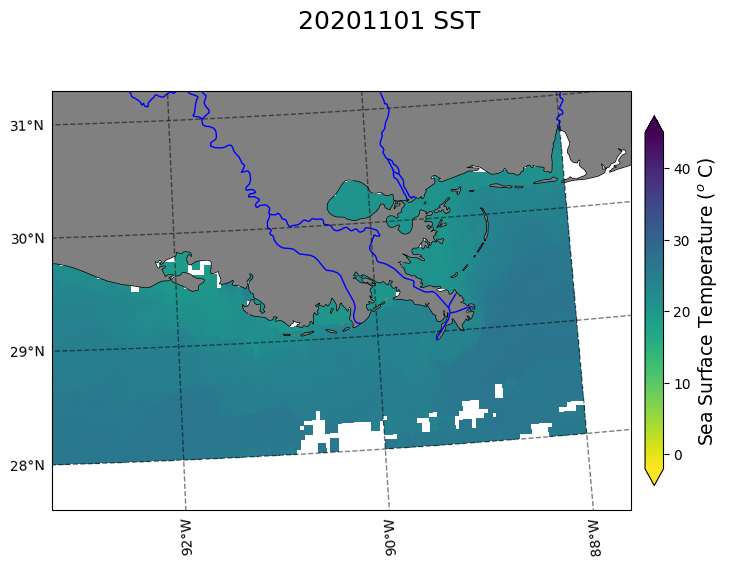

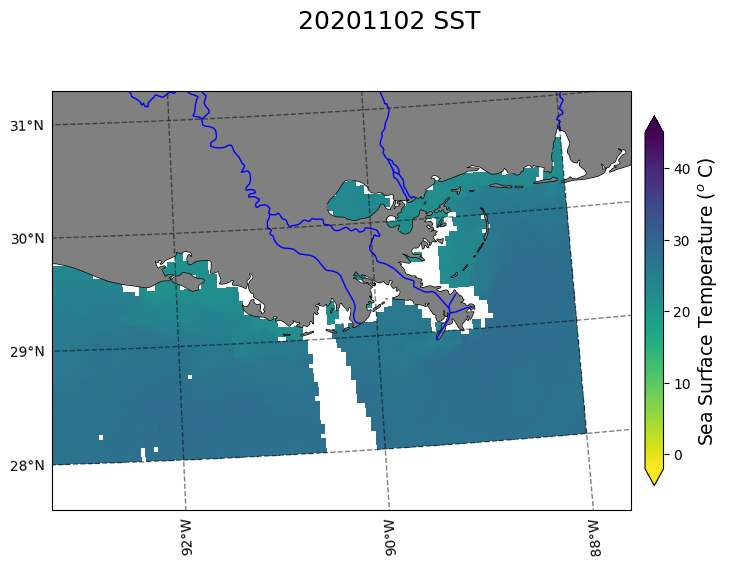

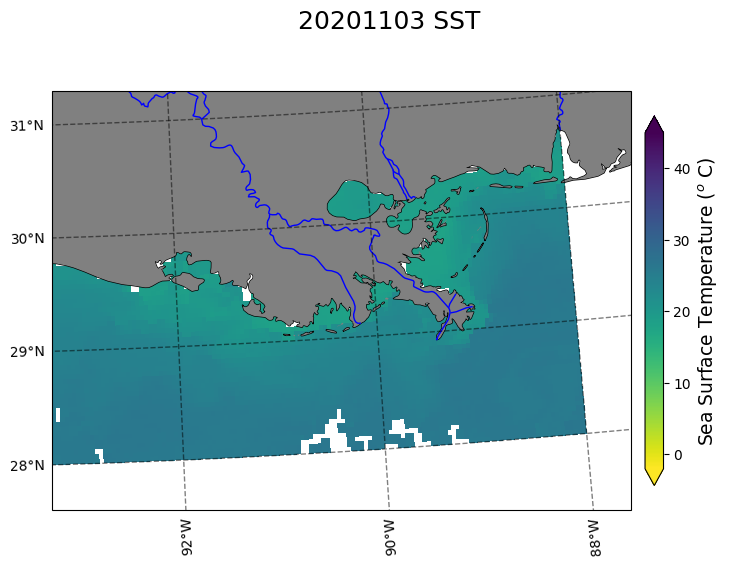

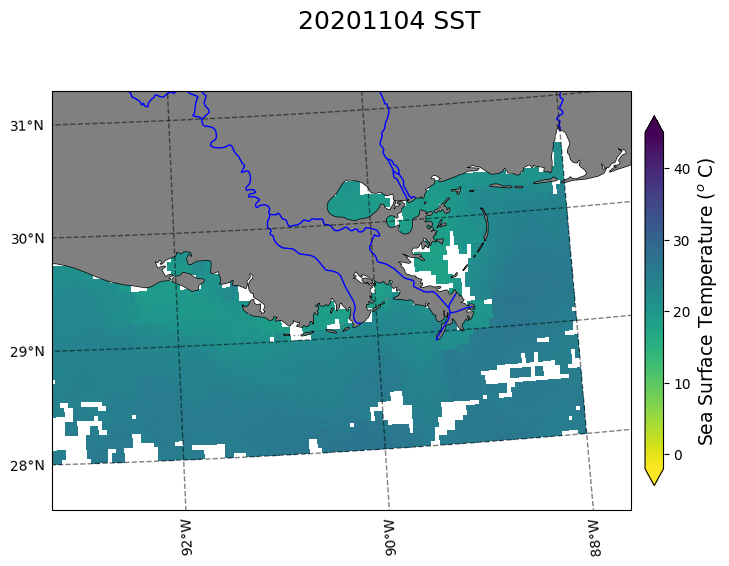

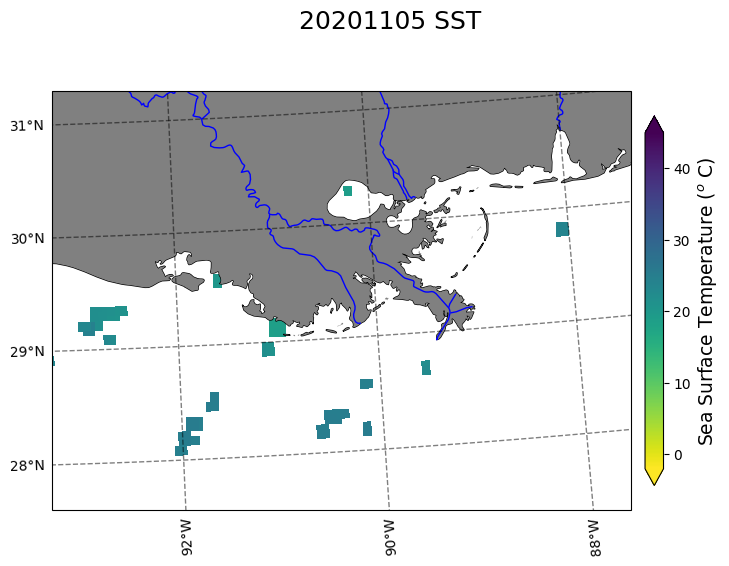

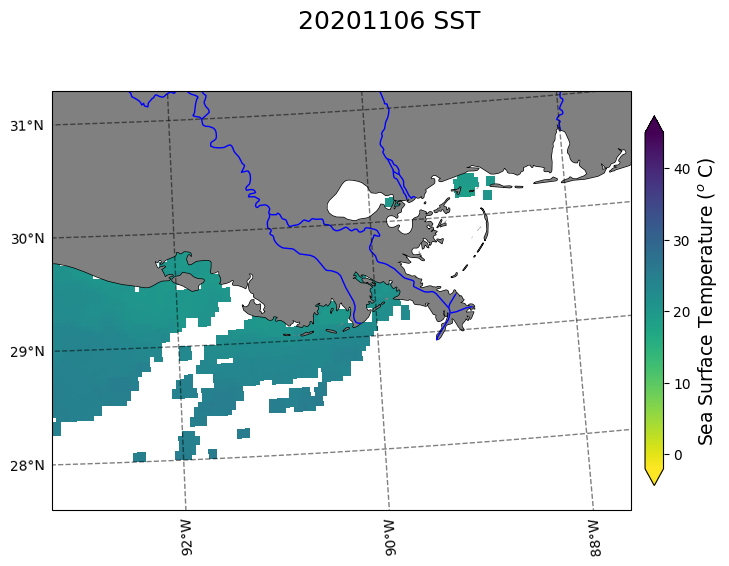

In [8]:
#Change for your file system
cfile = glob('C:/Users/sripr/Downloads/ccombined/*_MODIS_SST.nc')
cfile.sort()

#You may or may not need to change the extent
extent = (-93.2, -87.6, 31, 27.6)

resval = 1000
res = xr.DataArray(resval, attrs={"units": "meters"})

projection = ccrs.PlateCarree()


for file in cfile:
    fig = plt.figure(figsize=(9,6))
    ax = fig.add_subplot(1,1,1,
                     projection=ccrs.LambertConformal())   
    ###Change the numbers inside file[:] so that "day" gives you a date in YYYYMMDD format
    day = file[35:43]
    ds = xr.open_dataset(file, engine='netcdf4')
    data = ds.sst.mean('time')

    ###Change the "vmin" and "vmax" values here to give you better-looking figures. THis sets the min and max values for your colorbar
    im = data.where(data!=0).plot(ax=ax, vmin=-2, vmax=45, 
                                  x='lon', y='lat', 
                                  add_colorbar=False,
                                 transform=ccrs.PlateCarree(),
                                 cmap='viridis_r')
    ax.coastlines()
    ax.set_extent(extent)
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='grey', # change color here
                                                scale='10m')) 
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='rivers_lake_centerlines',
                                                edgecolor='blue', # change color here
                                                facecolor='none',
                                            scale='10m'))
    gl = ax.gridlines(crs=ccrs.PlateCarree(),
#If you change your extent, it may be worth adding some xlocs or ylocs, which creates grid lines for lat/lon
         ylocs=[28, 29, 30, 31], 
         xlocs=[-94, -92, -90, -88], 
         draw_labels=True, linewidth=1, color='k', alpha=0.5, linestyle='--', x_inline=False, y_inline=False)
    gl.right_labels = False
    gl.top_labels = False

    cb = fig.colorbar(im, ax=ax, shrink=0.8, extend='both', pad=0.02)
    #It may be best to 
    cb.set_label('Sea Surface Temperature ($^{o}$ C)', size=13.5)
    fig.suptitle(day + ' SST', size=18)

    fig.savefig('C:/Users/sripr/Downloads/WI20_Cruise_Images/'+day+'MODIS_SST.png')
        
# title = ['January 2022', 'February 2022', 'March 2022', 'April 2022', 'May 2022', 'June 2022',
#          'July 2022', 'August 2022', 'September 2022', 'October 2022', 'November 2022', 'December 2022']


In [3]:
from satpy.utils import debug_on
debug_on()

In [17]:
cfile = glob('C:/Users/sripr/Downloads/ccombined/*_MODIS_SST.nc')
cfile.sort()

for file in cfile:
    
    data = xr.open_dataset(file)
    data
data


<xarray.Dataset>
Dimensions:   (time: 14, lat: 96, lon: 240, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat       (lat) float32 30.98 30.94 30.9 30.85 ... 27.15 27.1 27.06 27.02
  * lon       (lon) float32 -93.98 -93.94 -93.9 -93.85 ... -84.1 -84.06 -84.02
Dimensions without coordinates: time, rgb, eightbitcolor
Data variables:
    sst       (time, lat, lon) float32 ...
    qual_sst  (time, lat, lon) float32 ...
    palette   (time, rgb, eightbitcolor) uint8 ...
Attributes: (12/61)
    product_name:                     AQUA_MODIS.20220710.L3m.DAY.SST.x_sst.nc
    instrument:                       MODIS
    title:                            MODISA Level-3 Equidistant Cylindrical ...
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    source:                           satellite observations from MODIS-Aqua
    ...                               ...
    processing_level:                 L3 Mapped
    cdm_data_type:                    grid
    proj4_string:                     +proj=eqc +lat_ts=0 +lat_0=0 +x_0=0 +y_...
    data_bins:                        1916
    data_minimum:                     28.072496
    data_maximum:                     32.109943